### Import the data

In [139]:
import pandas as pd

# Reading the content of the CSV file
df = pd.read_csv('university_student_data.csv', sep='\t')

# Printing out the first few rows of the data
df.head()


,Unnamed: 0,ID_ESTUDIANTE,EDAD,GÉNERO,TIPO_SEC,BECA,TRABAJO,ACTIVIDAD,PAREJA,SALARIO,...,PREP_ESTUDIO,PREP_EXAMEN,APUNTES,ESCUCHA,GUSTA_DISCUTIR,AULA,PROMEDIO_ACUM,PROMEDIO_ESP,ID_CURSO,CALIFICACIÓN
0,0,STUDENT1,2,2,3,3,1,2,2,1,...,1,1,3,2,1,2,2.285714,2.285714,1,2.285714
1,1,STUDENT2,2,2,3,3,1,2,2,1,...,1,1,3,2,3,2,3.571429,4.857143,1,2.285714
2,2,STUDENT3,2,2,2,3,2,2,2,2,...,1,1,2,2,1,1,3.571429,3.571429,1,2.285714
3,3,STUDENT4,1,1,1,3,1,2,1,2,...,1,2,3,2,2,1,4.857143,3.571429,1,2.285714
4,4,STUDENT5,2,2,1,3,2,2,1,3,...,2,1,2,2,2,1,3.571429,3.571429,1,2.285714


### Display basic information about the data

In [ ]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print("------------")
print(df.describe())

# Check for missing values
print("------------")
print(df.isnull().sum())


### Create Pandas series based on type of schooling

In [ ]:
# Do students from private high schools perform better?
grados_tipo_privada  = df[df['TIPO_SEC'] == 1]['CALIFICACIÓN']
grados_tipo_estatal  = df[df['TIPO_SEC'] == 2]['CALIFICACIÓN']
grados_tipo_otro     = df[df['TIPO_SEC'] == 3]['CALIFICACIÓN']

print("Privado: \n", grados_tipo_privada.describe(), "\n")
print("Estatal: \n", grados_tipo_estatal.describe(), "\n")
print("Otro: \n", grados_tipo_otro.describe(), "\n")

#### From here we can see that the mean of the final grades are identical in the case of public high shools and other type of high schools, and it is less for students in private high schools.
Even though the data set is not equal, there is 4 times the amount for public high school students than private high school students and there is even less data for the other type of high school students.
The standard deviation is almost the same for all type of schoolings wrt the final grade and seems like there is at least one student in each of the high school types where they reach maximum final grade. This can be an outlier though.
Also interesting point that only the "other" high schoolers had a minimum final grade of 2.3, all the others had 1.0.

### Question 1. A:
Do students who come from private high school perform better (get a better final grade)?

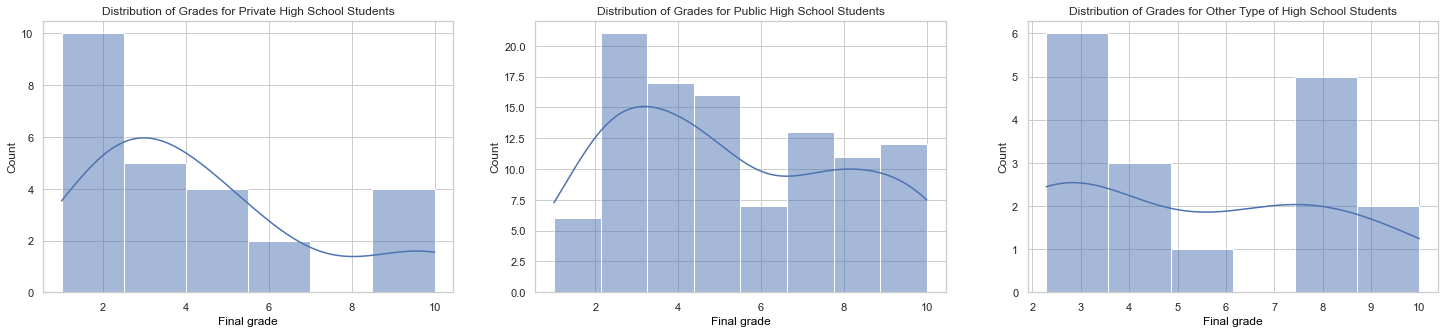

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(25, 5))  # 1 row, 3 columns

# Histogram for private high school grades
sns.histplot(grados_tipo_privada, kde=True, ax=axes[0])
sns.set(style="whitegrid")
axes[0].set_title('Distribution of Grades for Private High School Students')
axes[0].set_xlabel('Final grade', color = 'black')

# Histogram for public high school grades
sns.histplot(grados_tipo_estatal, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Grades for Public High School Students')
axes[1].set_xlabel('Final grade', color = 'black')


# Histogram for other high school grades
sns.histplot(grados_tipo_otro, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Grades for Other Type of High School Students')
axes[2].set_xlabel('Final grade', color = 'black')

fig.subplots_adjust(wspace=0.2)  # To adjust horizontal space between subplots

plt.show()

##### Here it can be seen that the Private HS (High School) students are stronger on the lower final grades, the Public HS studends are having a wider variety of final grades and stronger in the better region of the final grades, the distribution for the Other HS studends resembles the distribution of the Private HS students' one but they also seem stronger in the higher range wrt the final grade than the Private HS students. This was made with the full data set. By this my answer would be that the Students from Private HS are not performing better than the other HS's students.

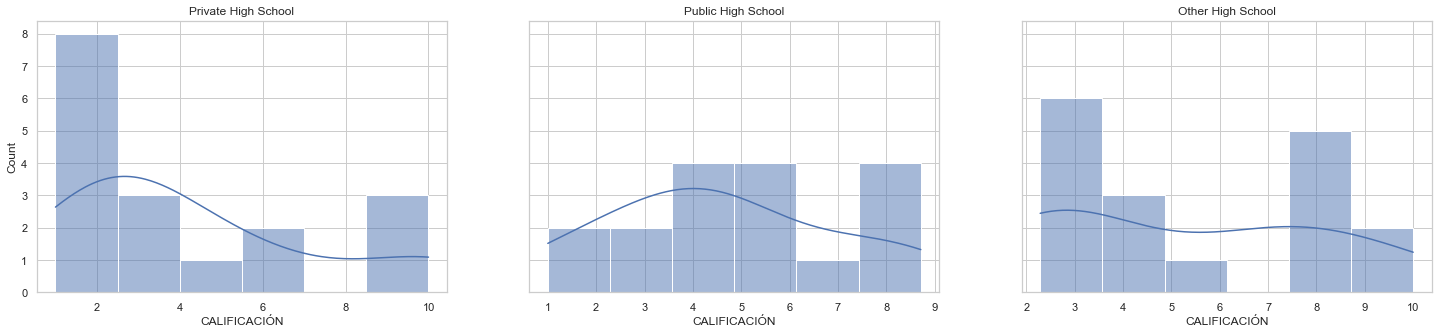

In [147]:
# Set a seed for reproducibility
seed = 42
# Choose the number of samples for each category - here I go with the number of the samples of the "Other HS" as that is the lowest, so each category will have the same sample as the lowest
num_samples = 17

# Randomly sample data for each category
private_school_sample   = df[df['TIPO_SEC'] == 1].sample(n=num_samples, random_state=seed)
public_school_sample    = df[df['TIPO_SEC'] == 2].sample(n=num_samples, random_state=seed)
other_school_sample     = df[df['TIPO_SEC'] == 3].sample(n=num_samples, random_state=seed)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=True)

# Plot for private school
sns.histplot(x='CALIFICACIÓN', data=private_school_sample, kde=True, ax=axes[0])
sns.set(style="whitegrid")
axes[0].set_title('Private High School')

# Plot for public school
sns.histplot(x='CALIFICACIÓN', data=public_school_sample, kde=True, ax=axes[1])
axes[1].set_title('Public High School')

# Plot for other school
sns.histplot(x='CALIFICACIÓN', data=other_school_sample, kde=True, ax=axes[2])
axes[2].set_title('Other High School')

plt.show()

##### Sampling the dataset with the number of the least populated part (other HS) the picture is resembling with the full dataset's visualizations, the conclusion is the same.

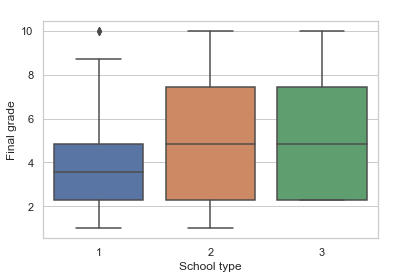

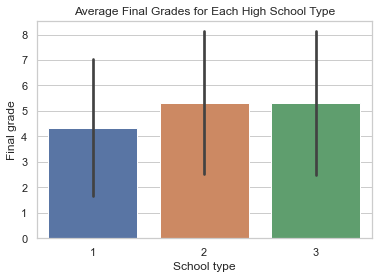

In [110]:
# Comparing the distribution of final grades for students from private, public and other type of high schools.
sns.boxplot(x='TIPO_SEC', y='CALIFICACIÓN', data=df)
sns.set(style="whitegrid")
plt.title('Comparison of Final Grades between Private, Public and "Other" Schools', color = 'white')
plt.xlabel('School type')
plt.ylabel('Final grade')
plt.show()

# Bar plot for the same question
sns.barplot(x='TIPO_SEC', y='CALIFICACIÓN', data=df, ci='sd')  # 'sd' adds error bars
plt.title('Average Final Grades for Each High School Type')
plt.xlabel('School type')
plt.ylabel('Final grade')
plt.show()

### Question 1. B:
Do students who are working get as good grades as those who are fully focused on studying?

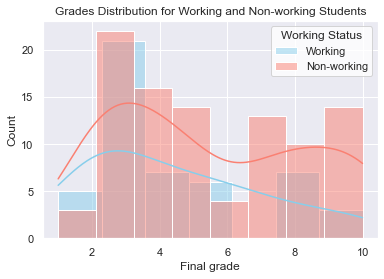

In [109]:
custom_palette = {1: 'skyblue', 2: 'salmon'}

# Create separate plots for 'Non-working' and 'Working'
for trabajo_value, label in zip([1, 2], ['Working', 'Non-working']):
    subset_data = df[df['TRABAJO'] == trabajo_value]
    sns.histplot(x='CALIFICACIÓN', data=subset_data, kde=True, color=custom_palette[trabajo_value], label=label)

# Set the background color of the plot
sns.set(style="whitegrid")
# style must be one of white, dark, whitegrid, darkgrid, ticks
plt.title('Grades Distribution for Working and Non-working Students')
plt.xlabel('Final grade')

# Display the legend
plt.legend(title='Working Status')

plt.show()

##### From this plot it can be seen that the non-working students are getting better grades throughout the overall range, than the working students.

### Question 1. C:
Among those students who work, does their salary influence their grades?

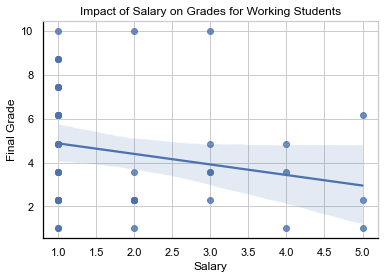

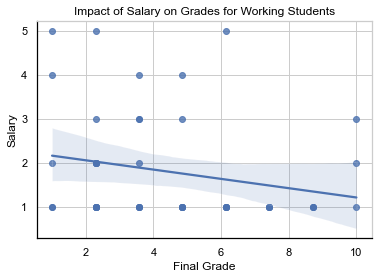

In [114]:
# Set the color for axis lines
#sns.set(style="whitegrid", rc={"axes.facecolor": "#282828", "grid.color": "#404040"})

ax = sns.regplot(x='SALARIO', y='CALIFICACIÓN', data=df[df['TRABAJO'] == 1])
sns.set(style="whitegrid")
ax.set_title('Impact of Salary on Grades for Working Students', color = 'black')
ax.set_xlabel('Salary', color = 'black')
ax.set_ylabel('Final Grade', color = 'black')

# Customize the color of axis lines and ticks
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='both', colors='black')

plt.show()


####

# Set the color for axis lines
#sns.set(style="whitegrid", rc={"axes.facecolor": "#282828", "grid.color": "#404040"})

ax = sns.regplot(x='CALIFICACIÓN', y='SALARIO', data=df[df['TRABAJO'] == 1])
sns.set(style="whitegrid")
ax.set_title('Impact of Salary on Grades for Working Students', color = 'black')
ax.set_xlabel('Final Grade', color = 'black')
ax.set_ylabel('Salary', color = 'black')

# Customize the color of axis lines and ticks
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='both', colors='black')

plt.show()




#### From these visualizations it seems that the lower salary does not affect the final grade, values can be found thoughtout the whole range. Also it seems that the lower income individuals are more capable of reaching higher grades than their higher-income counterparts. So it seems that the students who work are affected by the salary, they more they earn the lower higher grades they get. However, if the 10 final grade is an error and an outlier, and if these could be removed, then it would turn over and the counclusion would be that the higher the salary, the higher the final grade.

### Question 1. D:
Does the number of hours influence the students' performance?


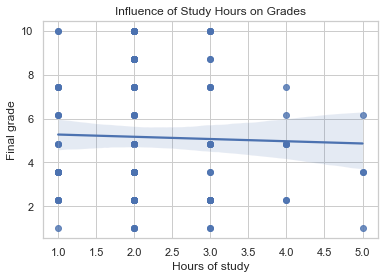

In [117]:
sns.regplot(x='HRS_ESTUDIO', y='CALIFICACIÓN', data=df)
sns.set(style="whitegrid")
plt.title('Influence of Study Hours on Grades')
plt.xlabel('Hours of study')
plt.ylabel('Final grade')
plt.show()


##### The hours spent studying does not influence the students' performance, it comes down to each students' individual needs, as some students can have the same performance with only 1 hour of study as other students with 3 or more hours, even though the sweet spot seems like to be between 2 and 3 hours.

### Question 2: Compute the variable correlation between the father and mother’s studies, wrt the final grade. And provide some initial insights you may find.

Correlation between father's and mother's education with respect to final grade: 0.43039759232030855


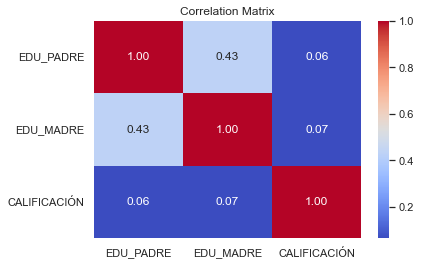

In [129]:
# Taking the following columns for this task:
# 'EDU_PADRE', 'EDU_MADRE', 'CALIFICACIÓN'

# Select the relevant columns
education_columns = ['EDU_PADRE', 'EDU_MADRE', 'CALIFICACIÓN']
education_df = df[education_columns]

# Compute the correlation matrix
correlation_matrix = education_df.corr()

# Extract the correlation between father's and mother's education with respect to final grade
father_mother_education_corr = correlation_matrix.loc['EDU_PADRE', 'EDU_MADRE']

# Print the correlation coefficient
print(f"Correlation between father's and mother's education with respect to final grade: {father_mother_education_corr}")

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


#### Computing the variable colleration between the parents' education and the students' final grade, statistical methods like Pearson correlation coefficient can be used. 
A few steps to be taken to calculate this:
Decode educational levels
Calculate correlation

The values are already numerical values with ascending order from 1 to 6, 6 being the highest education value.

Insights: 
- Father's education vs Mother's education is 0.43 and vice versa too, which indicates a moderate positive relationship between father's education with mother's education. 
    This suggests that on average if one of the parents have a higher education, the other parent tends to have a higher education too.

- The parent's high education, the correlation coefficients are relatively low (0.06 between father's education and final grade, 0.07 between mother's education and final grade). 
    This suggests a weak correlation between parents' education levels and the final grade of the student.


### Question 3. Categorize the students based on their features, and find a label for the “type of student” of each category, based on its data.

<function matplotlib.pyplot.show(close=None, block=None)>

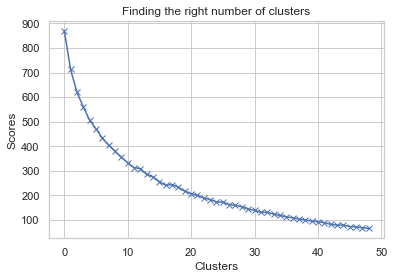

In [220]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the content of the CSV file
df = pd.read_csv('university_student_data.csv', sep='\t')

# Select relevant features for clustering
selected_features = ['TIPO_SEC', 'TRABAJO', 'FREC_LECTURA', 'APUNTES', 'ESCUCHA', 'CALIFICACIÓN']

# Create a new DataFrame with selected features
selected_df = df[selected_features]

# Handle missing values - in this case there is none
# selected_df = selected_df.dropna()

# Standardize numerical features to have zero mean and unit variance
scaler = StandardScaler()
selected_df_scaled = scaler.fit_transform(selected_df)

# Using the elbow method, we check what is the optimal number of clusters for the data with the selected features
scores = []

range_values = range(1,50)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(selected_df_scaled)
    scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show


In [221]:
# Apply the KMeans and train the model

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(selected_df_scaled)

KMeans(n_clusters=6, random_state=42)

In [222]:
# Display the cluster centers' shape, which is essentially a matrix

kmeans.cluster_centers_.shape

(6, 6)

In [223]:
# Display the cluster centers

kmeans.cluster_centers_

array([[ 1.97095572, -0.21050302, -0.23607452,  0.36443449,  0.19679746,
         0.03877188],
       [-0.49949162,  0.57803819, -0.24686493, -0.85314619, -0.65774231,
        -0.69308155],
       [-0.25615488, -1.39970842,  0.37289245,  0.80849333,  0.14674749,
        -0.45514952],
       [ 0.22758312, -0.97687984, -0.37730911, -1.32298909,  1.10770687,
        -0.01259594],
       [-0.25615488,  0.55180813,  0.78458842, -0.21625783, -0.42525214,
         1.33613877],
       [-0.19821756,  0.71443451, -0.41951163,  0.80849333,  0.25376678,
        -0.05972914]])

In [224]:
# Create a DataFrame, concatinating the cluster centers and the columns from the dataset with the selected features, which will hold a scaled dataset

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [selected_df.columns])
cluster_centers

,TIPO_SEC,TRABAJO,FREC_LECTURA,APUNTES,ESCUCHA,CALIFICACIÓN
0,1.970956,-0.210503,-0.236075,0.364434,0.196797,0.038772
1,-0.499492,0.578038,-0.246865,-0.853146,-0.657742,-0.693082
2,-0.256155,-1.399708,0.372892,0.808493,0.146747,-0.455150
3,0.227583,-0.976880,-0.377309,-1.322989,1.107707,-0.012596
4,-0.256155,0.551808,0.784588,-0.216258,-0.425252,1.336139
5,-0.198218,0.714435,-0.419512,0.808493,0.253767,-0.059729


In [225]:
# An inverse transform has to be done in order to scale the data back to its original values.

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [selected_df.columns])
cluster_centers

,TIPO_SEC,TRABAJO,FREC_LECTURA,APUNTES,ESCUCHA,CALIFICACIÓN
0,3.000000,1.562500,1.812500,2.750000,2.187500,5.258929
1,1.677419,1.935484,1.806452,2.064516,1.612903,3.198157
2,1.807692,1.000000,2.153846,3.000000,2.153846,3.868132
3,2.066667,1.200000,1.733333,1.800000,2.800000,5.114286
4,1.807692,1.923077,2.384615,2.423077,1.769231,8.912088
5,1.838710,2.000000,1.709677,3.000000,2.225806,4.981567


#### From the 6 clusters, different student performance can be seen.

Cluster 0 is for Other Type of High School students who either have a job or not and performing in the middle range with frequent reading and strong school presence.
Cluster 1 is for Students either from Private or Public High Schools who do not have a job, performing in the middle-to-low range, frequently reading and average school presence.
Cluster 2 is for Students almost exclusively from Public High Schools who have a job, performing in the middle-to-low range, frequently reading and average school presence.
Cluster 3 is for Students from Public High Schools who have a job, performing in the middle range, frequently reading and putting more effort into the active listening in the lectures.
Cluster 4 is for Students almost exclusively from the Public High Schools, not working, reading the most and taking notes which makes them high performers.
Cluster 5 is for Students almost exclusively from the Public High Schools, not working, least amount of reading but strong school presence which puts them into the medium performance range.

In [226]:
labels.shape

(145,)

In [227]:
# Feeding in the scaled data and passing it to the trained model (kmeans object) and generating the predictions of which student belongs to which cluster

y_kmeans = kmeans.fit_predict(selected_df_scaled)
y_kmeans

array([0, 0, 1, 2, 1, 1, 5, 2, 0, 1, 1, 2, 1, 5, 3, 5, 5, 1, 4, 5, 2, 1,
       2, 2, 1, 1, 5, 2, 5, 0, 3, 2, 1, 3, 1, 1, 0, 2, 1, 1, 1, 2, 1, 5,
       0, 1, 4, 1, 5, 1, 1, 3, 3, 4, 5, 3, 5, 2, 5, 5, 3, 0, 3, 1, 0, 1,
       5, 0, 3, 5, 4, 0, 4, 5, 4, 4, 4, 4, 2, 5, 3, 2, 2, 0, 0, 5, 5, 4,
       4, 4, 4, 3, 4, 2, 4, 0, 4, 2, 4, 4, 4, 5, 4, 4, 3, 4, 4, 3, 4, 4,
       1, 1, 0, 0, 3, 2, 5, 1, 5, 1, 2, 1, 5, 0, 2, 2, 2, 5, 5, 2, 2, 5,
       5, 5, 1, 2, 2, 1, 2, 3, 4, 5, 5, 1, 5], dtype=int32)

In [228]:
# Concatenate the clusters labels to the original DataFrame

selected_df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
selected_df_cluster

,Unnamed: 0,ID_ESTUDIANTE,EDAD,GÉNERO,TIPO_SEC,BECA,TRABAJO,ACTIVIDAD,PAREJA,SALARIO,...,PREP_EXAMEN,APUNTES,ESCUCHA,GUSTA_DISCUTIR,AULA,PROMEDIO_ACUM,PROMEDIO_ESP,ID_CURSO,CALIFICACIÓN,cluster
0,0,STUDENT1,2,2,3,3,1,2,2,1,...,1,3,2,1,2,2.285714,2.285714,1,2.285714,0
1,1,STUDENT2,2,2,3,3,1,2,2,1,...,1,3,2,3,2,3.571429,4.857143,1,2.285714,0
2,2,STUDENT3,2,2,2,3,2,2,2,2,...,1,2,2,1,1,3.571429,3.571429,1,2.285714,1
3,3,STUDENT4,1,1,1,3,1,2,1,2,...,2,3,2,2,1,4.857143,3.571429,1,2.285714,2
4,4,STUDENT5,2,2,1,3,2,2,1,3,...,1,2,2,2,1,3.571429,3.571429,1,2.285714,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,STUDENT141,2,1,2,3,1,1,2,1,...,1,2,1,2,1,4.857143,4.857143,9,7.428571,4
141,141,STUDENT142,1,1,2,4,2,2,2,1,...,1,3,2,2,1,7.428571,4.857143,9,7.428571,5
142,142,STUDENT143,1,1,1,4,2,2,2,1,...,1,3,3,2,1,6.142857,4.857143,9,2.285714,5
143,143,STUDENT144,2,1,2,4,1,1,1,5,...,1,2,1,2,1,7.428571,4.857143,9,6.142857,1


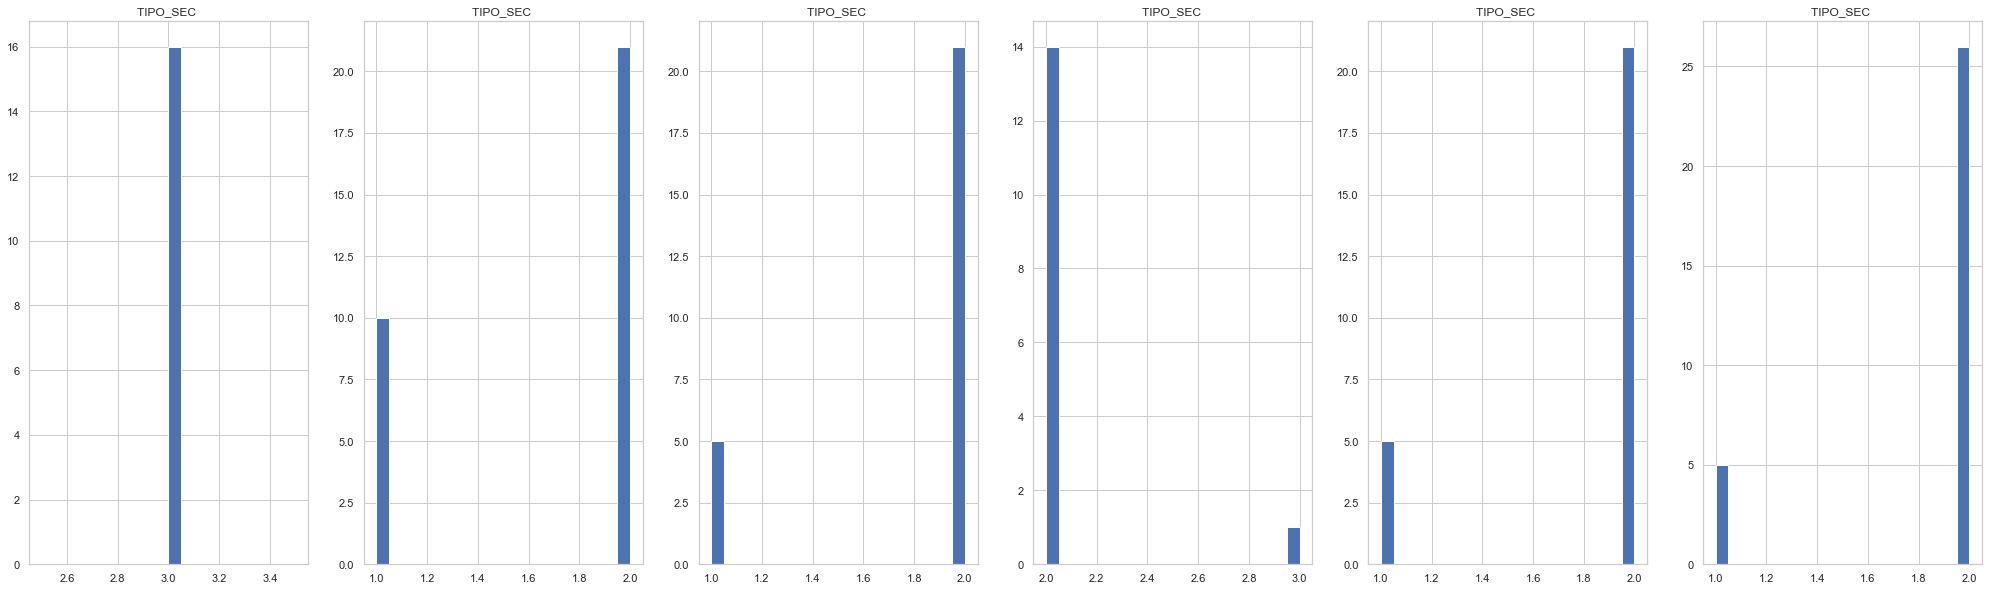

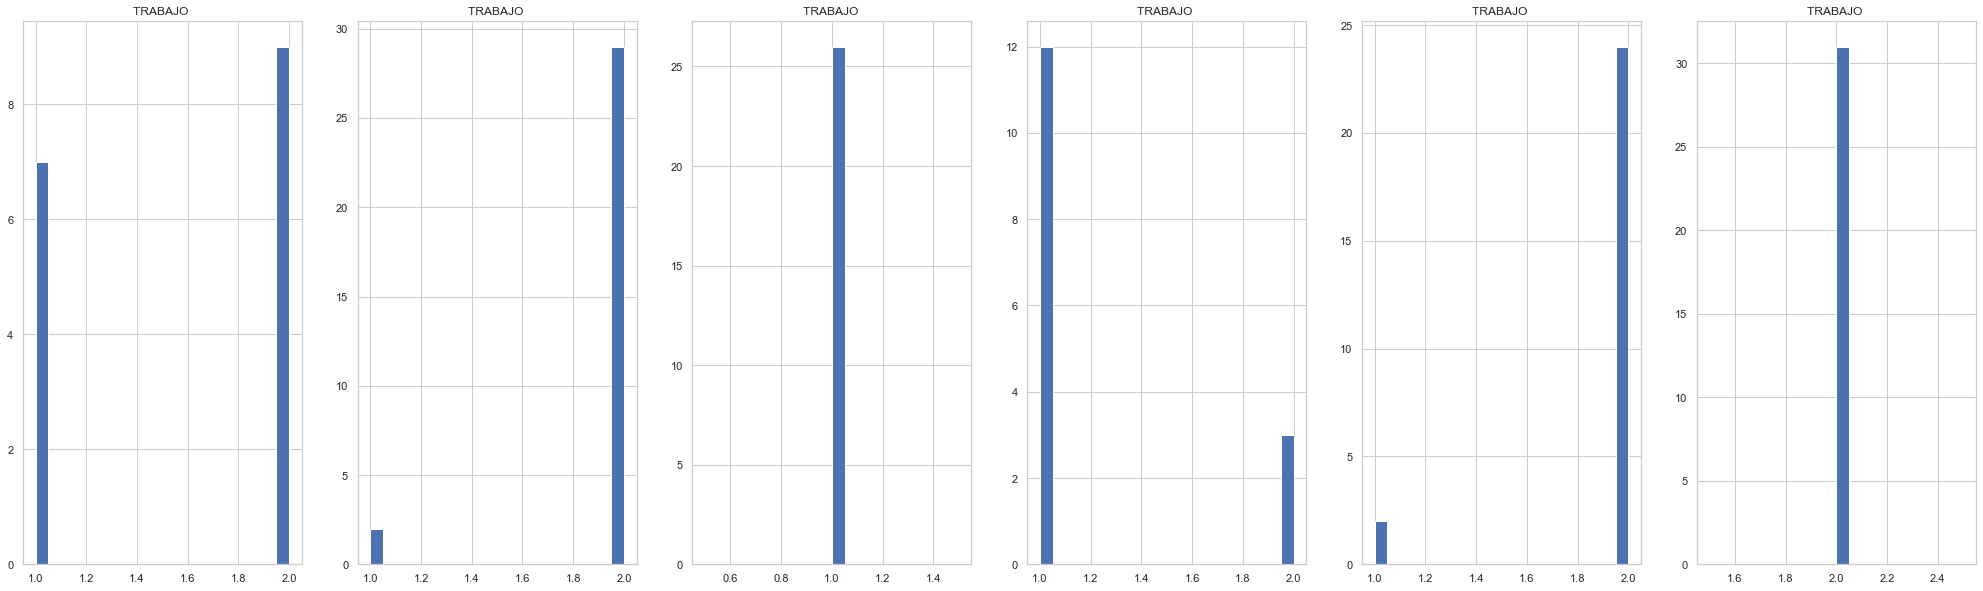

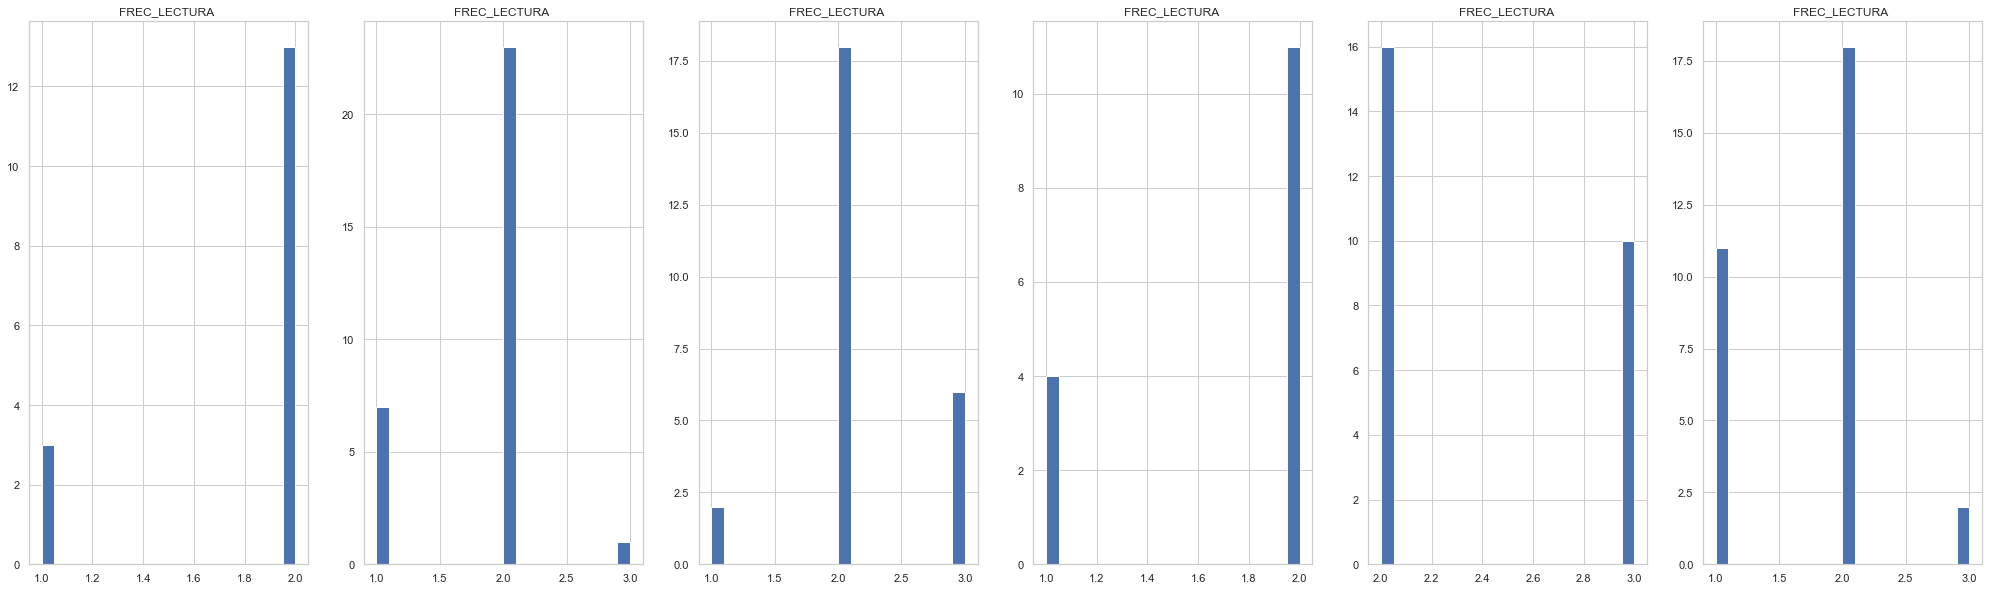

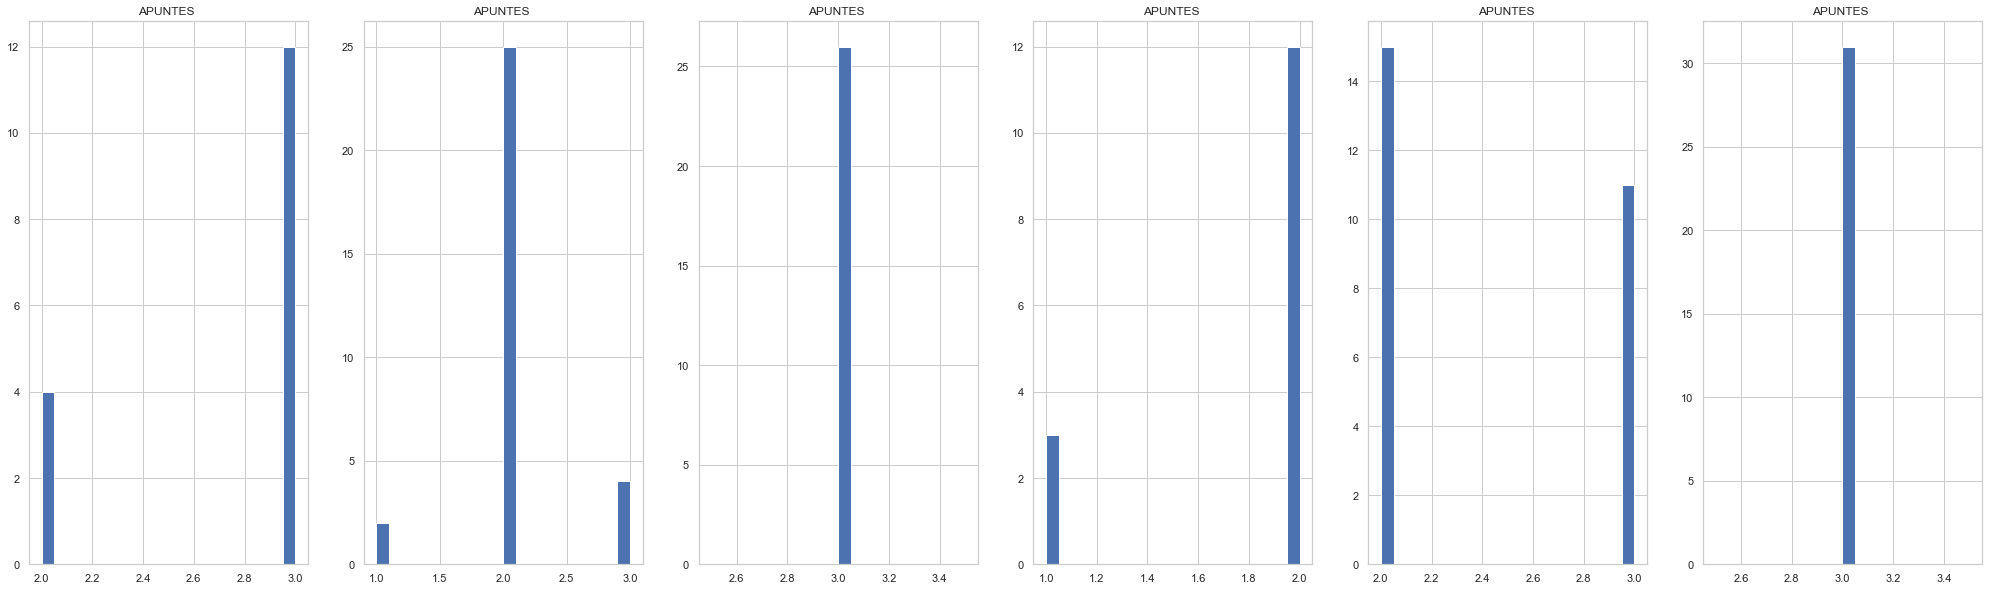

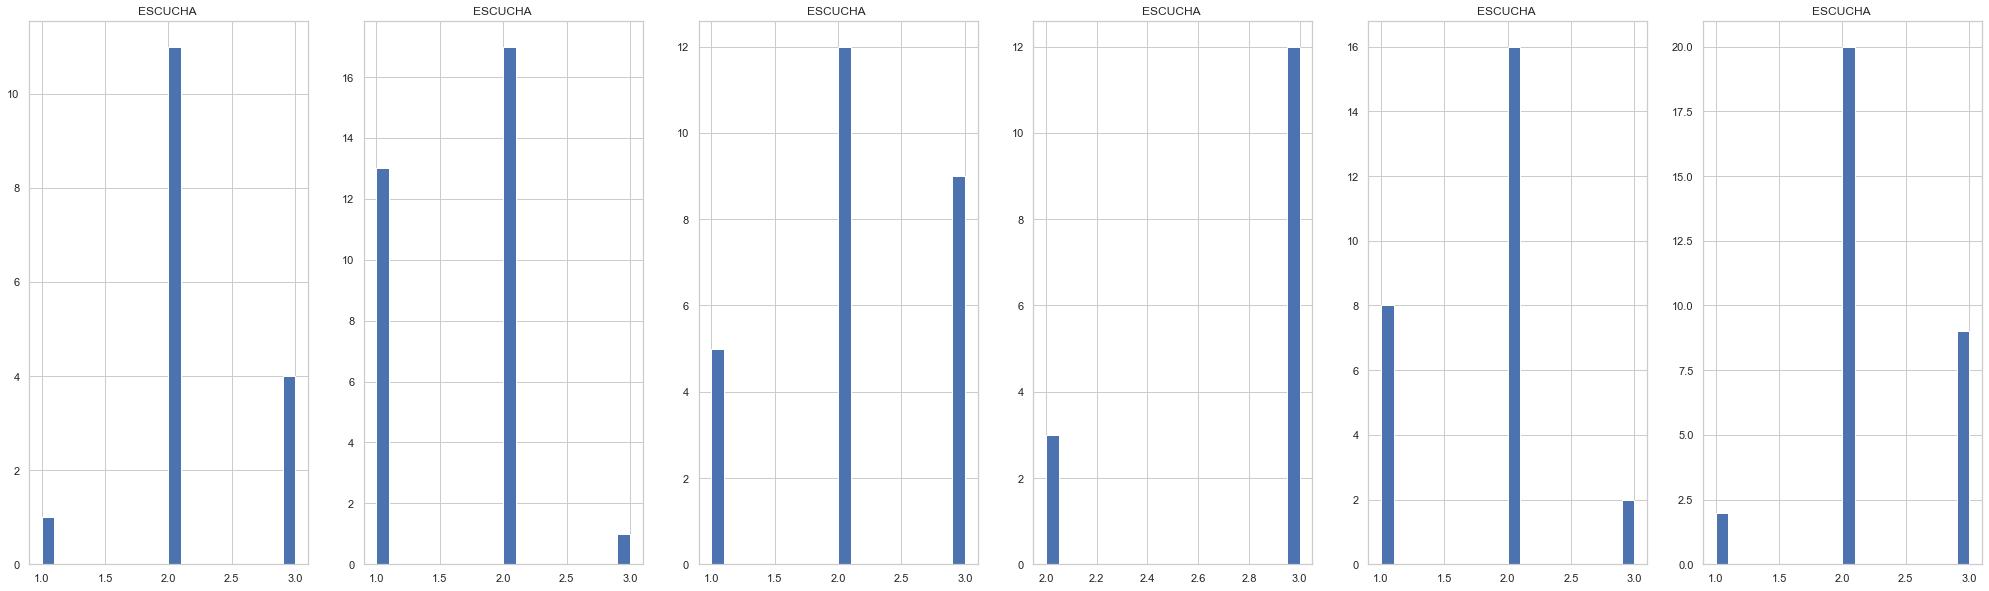

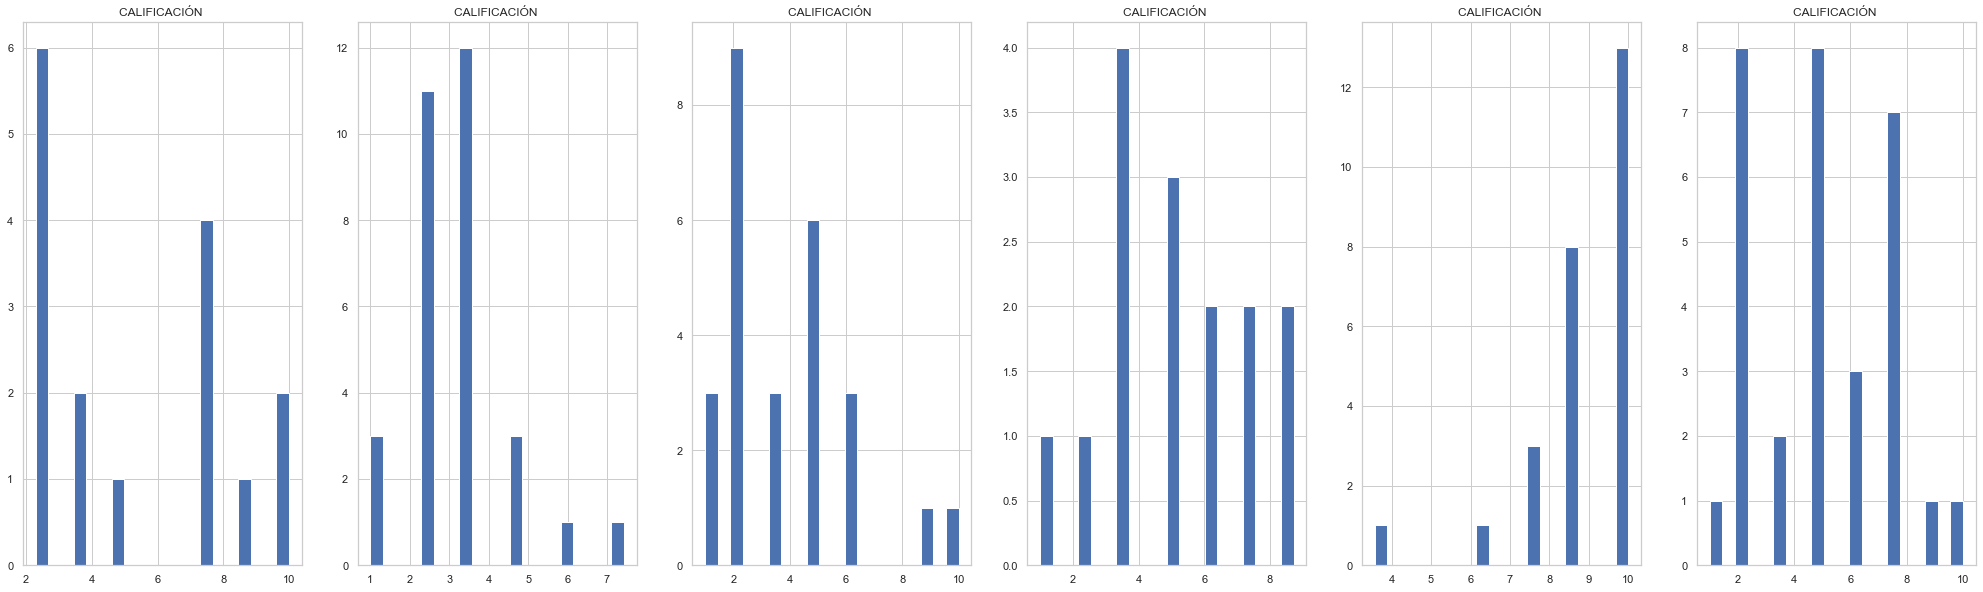

In [229]:
# Plot the histogram of various clusters
for i in selected_df.columns:
    plt.figure(figsize = (35, 10))
    for j in range(6):
        plt.subplot(1,6,j+1)
        cluster = selected_df_cluster[selected_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} '.format(i, j))

plt.show()

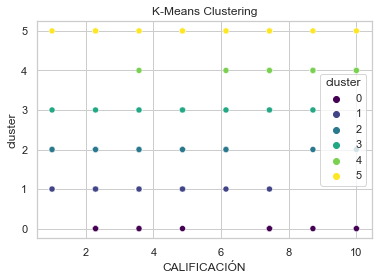

In [230]:
# Plot the relationship between cluster and final grade
#import plotly.express as px

#fig = px.scatter(selected_df_cluster, x = 'cluster', y = 'CALIFICACIÓN') #, size = 'ID_ESTUDIANTE')# , hover_name = 'TIPO_SEC')

#fig.update_layout(
#    title_text = 'School type vs Cluster'
#)

#fig.show()

sns.scatterplot(x='CALIFICACIÓN', y='cluster', hue='cluster', data=selected_df_cluster, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

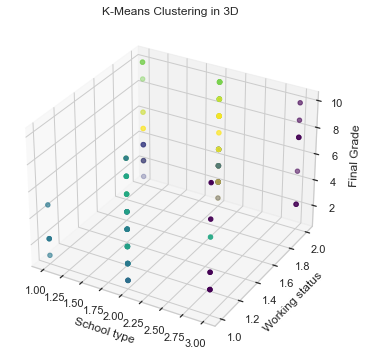

In [231]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(selected_df_cluster['TIPO_SEC'], selected_df_cluster['TRABAJO'], selected_df_cluster['CALIFICACIÓN'], c=selected_df_cluster['cluster'], cmap='viridis')
ax.set_xlabel('School type')
ax.set_ylabel('Working status')
ax.set_zlabel('Final Grade')
ax.set_title('K-Means Clustering in 3D')
plt.show()